In [1]:
import numpy as np, json, matplotlib,  pandas as pd, seaborn as sn
from datetime import datetime
from conceptual_engineering_assistant import Concept, ConceptualEngineeringAssistant
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain.document_loaders import WikipediaLoader

In [2]:
SAMPLE_SIZE = 4
females = np.random.choice(json.load(open('data/females-2023-03-15.json', 'r')), SAMPLE_SIZE)
males = np.random.choice(json.load(open('data/males-2023-03-15.json', 'r')), SAMPLE_SIZE)
non_binaries = np.random.choice(json.load(open('data/non-binaries-2023-03-15.json', 'r')), SAMPLE_SIZE)
trans_men = np.random.choice(json.load(open('data/trans-men-2023-03-15.json', 'r')), SAMPLE_SIZE)
trans_women = np.random.choice(json.load(open('data/trans-women-2023-03-15.json', 'r')), SAMPLE_SIZE)
sample = np.concatenate((females, trans_women, non_binaries, trans_men, males))

In [3]:
for entity in sample:
    entity["summary"] = WikipediaLoader(query=entity["name"], load_max_docs=1).load()[0].page_content[:400]

In [4]:
entities = pd.DataFrame.from_records(sample)
entities

,item,name,article,gender,summary
0,http://www.wikidata.org/entity/Q65068,Carina Wiese,https://en.wikipedia.org/wiki/Carina_Wiese,female,Carina Nicolette Wiese (born 26 February 1968)...
1,http://www.wikidata.org/entity/Q7499,Mary the Jewess,https://en.wikipedia.org/wiki/Mary_the_Jewess,female,Mary or Maria the Jewess (Latin: Maria Hebraea...
2,http://www.wikidata.org/entity/Q53107,"Anna of Hungary, Duchess of Macsó","https://en.wikipedia.org/wiki/Anna_of_Hungary,...",female,Anna of Hungary (born 1226) was a daughter of ...
3,http://www.wikidata.org/entity/Q69108,Christiane Paul,https://en.wikipedia.org/wiki/Christiane_Paul,female,Christiane Paul (German: [kʁɪsˈti̯a.nə paʊ̯l] ...
4,http://www.wikidata.org/entity/Q4762409,Angela Clayton,https://en.wikipedia.org/wiki/Angela_Clayton,trans woman,Angela Helen Clayton MBE (1959 – 8 January 201...
5,http://www.wikidata.org/entity/Q6773400,Marsha P. Johnson,https://en.wikipedia.org/wiki/Marsha_P._Johnson,trans woman,"Marsha P. Johnson (August 24, 1945 – July 6, 1..."
6,http://www.wikidata.org/entity/Q535129,Joan Roughgarden,https://en.wikipedia.org/wiki/Joan_Roughgarden,trans woman,Joan Roughgarden (born 13 March 1946) is an Am...
7,http://www.wikidata.org/entity/Q464844,Jin Xing,https://en.wikipedia.org/wiki/Jin_Xing,trans woman,Jin Xing (Chinese: 金星; pinyin: Jīn Xīng; Korea...
8,http://www.wikidata.org/entity/Q211040,Rose McGowan,https://en.wikipedia.org/wiki/Rose_McGowan,non-binary,"Rósa Arianna ""Rose"" McGowan (born September 5,..."
9,http://www.wikidata.org/entity/Q55767420,Kat Cunning,https://en.wikipedia.org/wiki/Kat_Cunning,non-binary,"Katrina Cunningham (born November 12, 1989) is..."


In [5]:
haslanger_woman_definition = """(i) S is regularly and for the most part observed or imagined to have 
certain bodily features presumed to be evidence of a female’s biological role in reproduction; 
(ii) that S has these features marks S within the dominant ideology of S’s society as someone who 
ought to occupy certain kinds of social position that are in fact subordinate (and so motivates 
and justifies S’s occupying such a position); and (iii) the fact that S satisfies (I) and (ii) plays 
a role in S’s systematic subordination, that is, along some dimension, S’s social position is oppressive, 
and S’s satisfying (i) and (ii) plays a role in that dimension of subordination"""

In [6]:
oed_woman_definition = "An adult female human being. The counterpart of man (see man n.1 II.4.)."

In [7]:
haslanger_woman = Concept("woman", "S", haslanger_woman_definition)

In [8]:
oed_woman = Concept("woman", "S", oed_woman_definition)

In [9]:
cea = ConceptualEngineeringAssistant()

In [10]:
haslanger_classifications = pd.DataFrame( 
    [ cea.classify_entity_with_summary(haslanger_woman, entity["name"], entity["summary"]) for entity in sample ], 
    columns = [ 'entity' , 'in_extension', 'rationale' ] 
    )

In [11]:
haslanger_results = pd.concat([entities[["name", "gender"]], haslanger_classifications[["in_extension", "rationale"]]], axis=1)
results_styler = haslanger_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,in_extension,rationale
0,Carina Wiese,female,True,"Based on the information provided, Carina Wiese is observed to have certain bodily features presumed to be evidence of a female’s biological role in reproduction, which satisfies condition (i) of the definition. There is no information provided that directly addresses conditions (ii) and (iii), which relate to societal ideologies and systematic subordination. However, it can be inferred from the societal norms that as a woman, she might be expected to occupy certain social positions that are subordinate, and her gender could play a role in her systematic subordination. Therefore, it can be concluded that Carina Wiese is a woman according to the given definition."
1,Mary the Jewess,female,True,"Based on the information provided, Mary the Jewess is identified as a female and presumably has the biological features associated with being a female. She lived in a society with a dominant ideology that likely marked her as someone who should occupy certain social positions, and her role as an early alchemist could have been seen as subordinate during her time. Therefore, she satisfies both conditions (i) and (ii) of the definition, making it reasonable to classify her as a woman."
2,"Anna of Hungary, Duchess of Macsó",female,True,"Anna of Hungary, Duchess of Macsó, fits the definition of a woman as provided. She is observed to have the bodily features associated with a female's biological role in reproduction, as evidenced by her ability to bear children. She also occupied a social position that was subordinate, as was typical for women in her society, being a daughter, sister, and wife. Furthermore, her social position was likely oppressive in some ways, given the societal norms and expectations of her time. Therefore, it can be concluded that Anna of Hungary, Duchess of Macsó, is a woman according to the given definition."
3,Christiane Paul,female,True,"Christiane Paul is identified as a woman based on the provided definition. She is observed to have certain bodily features associated with the female biological role in reproduction (i). As an actress in a society that often places women in subordinate social positions, she fits the second criterion (ii). The fact that she is a woman in the film industry, which is known for its systemic subordination of women, satisfies the third criterion (iii). Therefore, according to the given definition, Christiane Paul is a woman."
4,Angela Clayton,trans woman,True,"Angela Clayton is considered a woman based on the provided definition. She was observed and recognized as a woman (i), her societal role and position were marked as a woman's (ii), and her identity as a woman played a role in her social position (iii). Additionally, she was a campaigner for the rights of transgender people, further indicating her identification as a woman."
5,Marsha P. Johnson,trans woman,Unknown,"The definition provided for a woman is based on biological features, societal expectations, and systematic subordination. Marsha P. Johnson, as a self-identified drag queen and gay rights activist, may not fit neatly into this definition. While Johnson may have presented as female (satisfying part i of the definition), it is unclear whether she was viewed by society as someone who should occupy a subordinate social position based on her gender presentation (part ii), or whether her gender presentation played a role in her systematic subordination (part iii). Additionally, Johnson's self-identification as a drag queen suggests a complex relationship with gender that may not align with the provided definition of a woman. Therefore, it is unknown whether Marsha P. Johnson would be considered a woman based on the given definition."
6,Joan Roughgarden,trans woman,True,"Joan Roughgarden is identified as a woman, which satisfies condition (i) of the definition. She is also a part of a society where women have historically been in subordinate social positions, satisfyi

In [12]:
oed_classifications = pd.DataFrame( 
    [ cea.classify_entity_with_summary(oed_woman, entity["name"], entity["summary"]) for entity in sample ], 
    columns = [ 'entity' , 'in_extension', 'rationale' ] 
    )

In [13]:
oed_results = pd.concat([entities[["name", "gender"]], oed_classifications[["in_extension", "rationale"]]], axis=1)
results_styler = oed_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,in_extension,rationale
0,Carina Wiese,female,True,"The text states that Carina Wiese is a female and an adult, which aligns with the definition of a woman as an adult female human being. Therefore, it is true that Carina Wiese is a woman."
1,Mary the Jewess,female,True,"Mary the Jewess is described as an adult female human being, which aligns with the definition of a woman. Therefore, it is true that Mary the Jewess is a woman."
2,"Anna of Hungary, Duchess of Macsó",female,True,"Anna of Hungary, Duchess of Macsó, is considered a woman because she is an adult female human being. She was a daughter, indicating she is female, and she was born in 1226, indicating she is an adult. Therefore, she fits the definition of a woman."
3,Christiane Paul,female,True,"The text states that Christiane Paul is an adult female human being, which aligns with the definition of a woman. Therefore, it is true that Christiane Paul is a woman."
4,Angela Clayton,trans woman,True,"The text states that Angela Clayton is an adult human being who was also a campaigner for the rights of transgender people. This implies that she identifies as a female, which fits the definition of a woman as an adult female human being. Therefore, Angela Clayton is a woman."
5,Marsha P. Johnson,trans woman,True,"Marsha P. Johnson self-identified as a woman, and therefore, according to the definition provided, she can be considered a woman. This is because the definition does not specify biological sex, but rather refers to an adult female human being, which can include those who identify as female."
6,Joan Roughgarden,trans woman,True,"The text identifies Joan Roughgarden as a female. Since she is an adult human being, she fits the definition of a woman."
7,Jin Xing,trans woman,True,"Jin Xing is considered a woman because she is a transgender celebrity, meaning she has transitioned from her birth sex to female. As an adult female human being, she fits the definition of a woman."
8,Rose McGowan,non-binary,True,"The text states that Rose McGowan is an adult female human being, which fits the definition of a woman. Therefore, it is true that Rose McGowan is a woman."
9,Kat Cunning,non-binary,True,"The text identifies Kat Cunning as a female. According to the definition provided, a woman is an adult female human being. Therefore, it is true that Kat Cunning is a woman."


In [14]:
def confusion_matrix(results):
    return results[["gender", "in_extension"]].groupby(['gender','in_extension'], sort=False).size().unstack(fill_value=0)[["True", "Unknown", "False"]]

<Axes: xlabel='in_extension', ylabel='gender'>

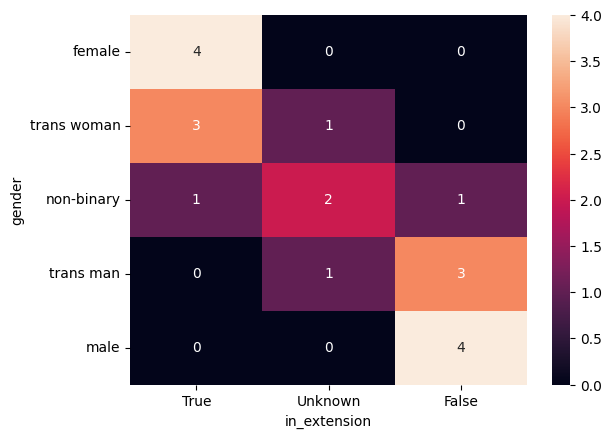

In [15]:
sn.heatmap(confusion_matrix(haslanger_results), annot=True)

<Axes: xlabel='in_extension', ylabel='gender'>

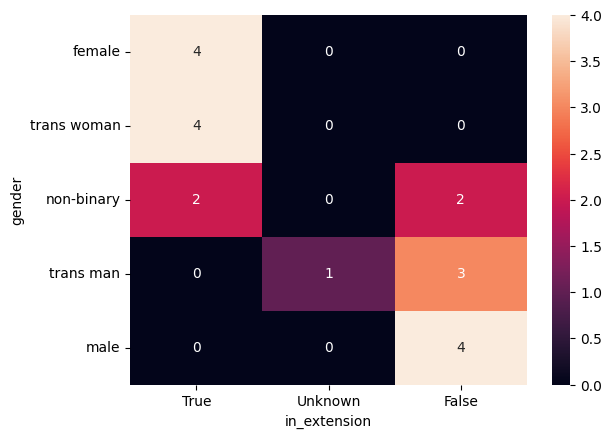

In [16]:
sn.heatmap(confusion_matrix(oed_results), annot=True)

In [17]:
def evaluation_record(model, concept, data):
    return {
        "created": datetime.now().isoformat(),
        "model": {
            "name": cea.model_name,
            "temperature": cea.temperature,
        },
        "concept": {
            "term": concept.term,
            "variable": concept.variable,
            "definition": concept.definition,
        },
        "data": data.to_dict('records'),
    }

In [18]:
er = evaluation_record(cea, haslanger_woman, pd.concat([entities, haslanger_classifications], axis=1))

In [19]:
json.dump(er, open(f'data/{er["model"]["name"]}_{er["concept"]["term"]}_{er["created"]}.json', 'w'))